In [1]:
RANDOM_SEED = 42
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import average_precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV , LeaveOneOut, ShuffleSplit, cross_val_predict
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, average_precision_score
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from os import listdir
from os.path import isfile, join
import pandas as pd
import re
from imblearn.combine import SMOTETomek
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from mlxtend.plotting import plot_decision_regions
import dill
from sklearn.preprocessing import label_binarize
random_state = np.random.RandomState(0)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#Encode Activity label
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import defaultdict 

RANDOM_SEED = 2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Resampling by SMOTE

In [0]:
def smotetomek(X, y):
  smt = SMOTETomek(ratio='auto', sampling_strategy='not minority')
  X_res, y_res = smt.fit_sample(X, y)
  return X_res, y_res

In [0]:
def auc_plotter(y_test_bi, classes_pred, y_pred_bi):
  #https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings

  try:
    #AUC ROC OVR and OVO
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(classes_pred)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_pred_bi[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bi.ravel(), y_pred_bi.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    lw = 2

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))


    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()  

    #AUPR
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bi[:, i],
                                                            y_pred_bi[:, i])
        average_precision[i] = average_precision_score(y_test_bi[:, i], y_pred_bi[:, i])

    # A "macro-average": quantifying score on all classes jointly
    precision["macro"], recall["macro"], _ = precision_recall_curve(y_test_bi.ravel(),
        y_pred_bi.ravel())
    average_precision["macro"] = average_precision_score(y_test_bi, y_pred_bi,
                                                        average="macro")
    print('Average precision score, macro-averaged over all classes: {0:0.2f}'
          .format(average_precision["macro"]))

    plt.figure()
    plt.step(recall['macro'], precision['macro'], where='post')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, macro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["macro"]))
    plt.show() 
  except:
    print('\n Failed to plot AUC')

In [0]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [0]:
def prep_var(X_train, X_test):
  X_train['Activity_Label'] = labelencoder.fit_transform(X_train['Activity_Label']) #fitting and transforming the desired categorical column.
  X_test['Activity_Label'] = labelencoder.fit_transform(X_test['Activity_Label']) #fitting and transforming the desired categorical column.
  #Include only numeric cols
  X_train = X_train.select_dtypes(include=numerics)
  X_test = X_test.select_dtypes(include=numerics)
  #Exclude objects
  X_train = X_train.select_dtypes(exclude=objs)
  X_test = X_test.select_dtypes(exclude=objs)
  #Normalize feats
  X_train = normalize(X_train)
  X_test = normalize(X_test)

  #Cov to DF
  X_train = pd.DataFrame(X_train)
  X_test = pd.DataFrame(X_test)

  #NA to num
  X_train[:] = np.nan_to_num(X_train)
  X_test[:] = np.nan_to_num(X_test)

  #Convert to DF
  X_train = pd.DataFrame(X_train)
  X_test = pd.DataFrame(X_test)

  return X_train, X_test

In [0]:
def X_split_setup(df, columns_lab, target):
  X = df[df.columns.drop(list(columns_lab))]
  X = X[X.columns.drop((target))]
  return X

In [0]:
def CountFrequency(my_list): 
  # Creating an empty dictionary  
  freq = {} 
  for item in my_list: 
      if (item in freq): 
          freq[item] += 1
      else: 
          freq[item] = 1
  label_count = {}
  for key, value in freq.items(): 
    label_count[key] = value
    print ("% d : % d"%(key, value)) 
  return label_count

In [0]:
# Loop to iterate through measurements, count its target class and split into train and test depending on the ration
def get_meas_list(dfcur, unique_meas, split_ratio = 0.8):

  curr_label_count = {}
  train_meas = []
  test_meas = []
  for meas in unique_meas:
    curr_label = dfcur.loc[dfcur['measurement_id']==str(meas)][target].values[0]
    curr_label_count[str(curr_label)] = curr_label_count.get(str(curr_label), 0) + 1
    if curr_label_count[str(curr_label)] <= int(round(label_count[curr_label] * split_ratio)):
      train_meas.append(meas)
    else:
      test_meas.append(meas)

  return train_meas, test_meas

##Load Data

In [10]:
user = 1006
savedir = "/content/drive/My Drive/BEAT_PD/Data/CIS-PD/training_data/HAR/merged/Windowed_Features/merged/"

df = pd.read_csv(savedir + str(user) + '.csv')

df = df[df.columns.drop(list(df.filter(regex='Unn')))]
df.head()

,on_off,tremor,dyskinesia,Timestamp,Reading,measurement_id,subject_id,X,Y,Z,Gravity_X,Gravity_Y,Gravity_Z,Angle_X,Angle_Y,Angle_Z,X-AutoCorrelation,Y-AutoCorrelation,Z-AutoCorrelation,GravityX-AutoCorrelation,GravityY-AutoCorrelation,GravityZ-AutoCorrelation,AngleX-AutoCorrelation,AngleY-AutoCorrelation,AngleZ-AutoCorrelation,AVG_x,AVG_y,AVG_z,STD_x,STD_y,STD_z,RMS_x,RMS_y,RMS_z,MinMax_x,MinMax_y,MinMax_z,FiltSTD3_x,FiltSTD3_y,FiltSTD3_z,...,"Z_bp_filt_[3.5, 7.5]_dom_freq_magnitude","Z_bp_filt_[3.5, 7.5]_dom_freq_ratio","Z_bp_filt_[3.5, 7.5]_spectral_flatness","Z_bp_filt_[3.5, 7.5]_spectral_entropy","X_bp_filt_[0.25, 3.5]_dom_freq_value","X_bp_filt_[0.25, 3.5]_dom_freq_magnitude","X_bp_filt_[0.25, 3.5]_dom_freq_ratio","X_bp_filt_[0.25, 3.5]_spectral_flatness","X_bp_filt_[0.25, 3.5]_spectral_entropy","Y_bp_filt_[0.25, 3.5]_dom_freq_value","Y_bp_filt_[0.25, 3.5]_dom_freq_magnitude","Y_bp_filt_[0.25, 3.5]_dom_freq_ratio","Y_bp_filt_[0.25, 3.5]_spectral_flatness","Y_bp_filt_[0.25, 3.5]_spectral_entropy","Z_bp_filt_[0.25, 3.5]_dom_freq_value","Z_bp_filt_[0.25, 3.5]_dom_freq_magnitude","Z_bp_filt_[0.25, 3.5]_dom_freq_ratio","Z_bp_filt_[0.25, 3.5]_spectral_flatness","Z_bp_filt_[0.25, 3.5]_spectral_entropy","PC1_[3.5, 7.5]_dom_freq_value","PC1_[3.5, 7.5]_dom_freq_magnitude","PC1_[3.5, 7.5]_dom_freq_ratio","PC1_[3.5, 7.5]_spectral_flatness","PC1_[3.5, 7.5]_spectral_entropy","PC1_[0.25, 3.5]_dom_freq_value","PC1_[0.25, 3.5]_dom_freq_magnitude","PC1_[0.25, 3.5]_dom_freq_ratio","PC1_[0.25, 3.5]_spectral_flatness","PC1_[0.25, 3.5]_spectral_entropy","X_bp_filt_[3.5, 7.5]_signal_entropy","Y_bp_filt_[3.5, 7.5]_signal_entropy","Z_bp_filt_[3.5, 7.5]_signal_entropy","X_bp_filt_[0.25, 3.5]_signal_entropy","Y_bp_filt_[0.25, 3.5]_signal_entropy","Z_bp_filt_[0.25, 3.5]_signal_entropy","PC1_[3.5, 7.5]_signal_entropy","PC1_[0.25, 3.5]_signal_entropy",hand_movement,hand_amp,hand_jerk
0,0.0,0.0,NaN,1,14,0ca76d3f-ef24-4b60-9dc1-d6d092c65f71,1006,-0.206659,-0.874125,-0.874125,-0.221598,-0.044895,-0.955011,10.870069,32.986150,54.384114,-1.622722,-1.647222,-1.627949,-1.496284,-1.578708,-1.600544,-0.600124,-0.969152,-5.111457,0.122917,0.347259,0.518192,0.078369,0.222134,0.330677,0.145775,0.412229,0.614711,0.206658,0.587648,0.874122,0,0,0,...,0.094833,0.353528,-6.700918,0.746510,0.390625,0.328344,0.823616,-12.044961,0.513619,0.195312,0.277873,0.586283,-9.970273,0.577884,0.000000,0.239945,0.517479,-11.721227,0.552148,6.054688,0.205955,0.399291,-10.051507,0.686945,0.390625,0.334490,0.819706,-12.548421,0.504416,3.635034,4.589978,5.265020,3.621067,3.981369,3.357773,4.154216,3.830607,0,0.005389,0.019321
1,0.0,0.0,NaN,2,14,0ca76d3f-ef24-4b60-9dc1-d6d092c65f71,1006,-0.206659,-0.874125,-0.874125,-0.117044,-0.044895,-0.483059,11.096422,32.986150,53.798410,-1.170307,-1.091383,-0.757633,-0.917793,-1.099916,-0.882669,-0.618399,-2.200335,-2.208812,0.181089,0.512601,0.759404,0.034456,0.099187,0.144316,0.184338,0.522109,0.772995,0.129421,0.370651,0.548861,0,0,0,...,0.127993,0.292349,-6.838375,0.755927,0.000000,0.341580,0.560208,-11.746869,0.516617,0.000000,0.348695,0.739854,-12.919270,0.485978,0.000000,0.382184,0.642364,-13.452262,0.469265,4.687500,0.119489,0.280460,-10.822492,0.712350,0.585938,0.343114,0.808573,-11.989002,0.499808,2.762598,4.566679,5.088018,4.069026,4.114073,4.099517,2.946669,3.848690,0,0.005372,0.027013
2,0.0,0.0,NaN,3,14,0ca76d3f-ef24-4b60-9dc1-d6d092c65f71,1006,-0.206659,-0.874125,-0.874125,-0.014942,-0.044895,-0.016201,11.096422,33.074335,53.602757,-0.927953,-0.992806,-1.196531,-0.946790,-1.052331,-1.158660,-1.341371,-1.892038,-1.822227,0.198787,0.562409,0.824130,0.004532,0.015289,0.032006,0.198838,0.562617,0.824752,0.014469,0.046229,0.086171,9,10,10,...,0.177582,0.347254,-7.824052,0.748277,0.000000,0.212399,0.400535,-8.419963,0.688801,0.000000,0.460627,0.686997,-12.776174,0.473517,0.000000,0.370434,0.622300,-11.507022,0.520594,4.687500,0.143158,0.336988,-9.635884,0.708691,0.585938,0.231180,0.550041,-7.583328,0.707603,2.766162,4.253306,5.028314,3.41138

In [0]:
columns_lab = ['Timestamp', 'Reading',
            'subject_id']

In [12]:
#Numeric feats
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics)
#Objects
objs = ['O']
df.select_dtypes(include=objs)

,measurement_id,Activity_Label
0,0ca76d3f-ef24-4b60-9dc1-d6d092c65f71,Inactivity
1,0ca76d3f-ef24-4b60-9dc1-d6d092c65f71,Inactivity
2,0ca76d3f-ef24-4b60-9dc1-d6d092c65f71,Inactivity
3,0ca76d3f-ef24-4b60-9dc1-d6d092c65f71,Inactivity
4,0ca76d3f-ef24-4b60-9dc1-d6d092c65f71,Inactivity
...,...,...
45214,27c0e5f5-d68f-4c42-a327-1bce67d5d394,Inactivity
45215,27c0e5f5-d68f-4c42-a327-1bce67d5d394,Inactivity
45216,27c0e5f5-d68f-4c42-a327-1bce67d5d394,Inactivity
45217,27c0e5f5-d68f-4c42-a327-1bce67d5d394,Inactivity


In [0]:
#Split dfs by target
df_on_off = df.drop(labels= ['tremor', 'dyskinesia'], axis=1)
df_trem = df.drop(labels= ['on_off', 'dyskinesia'], axis=1)
df_dys = df.drop(labels= ['on_off', 'tremor'], axis=1)

df_on_off = df_on_off[df_on_off['on_off'].notna()]
df_trem = df_trem[df_trem['tremor'].notna()]
df_dys = df_dys[df_dys['dyskinesia'].notna()]

df_on_off = df_on_off.fillna(df_on_off.median())
df_trem = df_trem.fillna(df_trem.median())
df_dys = df_dys.fillna(df_dys.median())

##Tremor

In [0]:
dfcur = df_trem # Set the DF to tremor
target = 'tremor'
#cols = set(dfcur.columns) - set(columns_lab)
y = dfcur[target]
measurement_id = dfcur['measurement_id']

#dfcur['Rows'] = np.arange(len(dfcur))
#unique_label = dfcur['Rows'].astype(str) + str('_') + df['measurement_id']
#user_labels = pd.DataFrame(list(zip(y, measurement_id, unique_label)), columns=[target, 'measurement_id', 'unique_label'])
#dfcur['unique_label'] = unique_label

X = dfcur[dfcur.columns.drop(list(columns_lab))]
X = X[X.columns.drop((target))]

unique_meas = set(measurement_id)
unique_df = pd.DataFrame(dfcur.groupby(['measurement_id']).median())
y_train, y_test = pd.DataFrame(columns=[target]),pd.DataFrame(columns=[target])

##On_Off

In [0]:
dfcur = df_on_off # Set the DF to on_off
target = 'on_off'
#cols = set(dfcur.columns) - set(columns_lab)
y = dfcur[target]
measurement_id = dfcur['measurement_id']

#dfcur['Rows'] = np.arange(len(dfcur))
#unique_label = dfcur['Rows'].astype(str) + str('_') + df['measurement_id']
#user_labels = pd.DataFrame(list(zip(y, measurement_id, unique_label)), columns=[target, 'measurement_id', 'unique_label'])
#dfcur['unique_label'] = unique_label

X = dfcur[dfcur.columns.drop(list(columns_lab))]
X = X[X.columns.drop((target))]

unique_meas = set(measurement_id)
unique_df = pd.DataFrame(dfcur.groupby(['measurement_id']).median())
y_train, y_test = pd.DataFrame(columns=[target]),pd.DataFrame(columns=[target])

In [16]:
label_count = CountFrequency(unique_df[target]) 

dfcur = dfcur[dfcur.columns.drop(list(dfcur.filter(regex='Rows')))]
train_meas, test_meas = get_meas_list(dfcur, unique_meas, split_ratio = 0.8)

train_df = dfcur[dfcur['measurement_id'].isin(train_meas)]
test_df = dfcur[dfcur['measurement_id'].isin(test_meas)]

print('\nAre any train/test measurement_ids shared? \n' + str(bool(set(train_df['measurement_id'])&set(test_df['measurement_id']))))

 0 :  27
 1 :  9
 2 :  1

Are any train/test measurement_ids shared? 
False


In [0]:
#X prep
X_train = X_split_setup(train_df, columns_lab, target)
X_test = X_split_setup(test_df, columns_lab, target)

#y prep
y_train[target] = train_df[target]
y_test[target] = test_df[target]

In [0]:
#Prep the data - remove nas and label encode
X_train, X_test = prep_var(X_train, X_test)

##PCA

In [0]:
def PCA_X(X_train, X_test):
  pca = PCA(n_components=35)
  try:
    X_train = pca.fit_transform(X_train)
  except:
    pca = PCA(n_components=X_train.shape[1]-10)
    X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  print('Total Explained variance: ' + str(sum(pca.explained_variance_ratio_)))

  X_train = pd.DataFrame(X_train)
  X_test = pd.DataFrame(X_test)
  return X_train, X_test

In [20]:
#PCA
X_train, X_test = prep_var(X_train, X_test)
X_train, X_test = PCA_X(X_train, X_test)

Total Explained variance: 0.8142800495365842


## Multinomial Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial')

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

logreg.score(X_test,y_test)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7035469107551487

## Random Forest


In [0]:
def randF_simple(X_train, X_test, y_train, y_test):
  
  #setup dfs
  classes_tr = y_train.iloc[0:, 0].unique()
  classes_test = y_test.iloc[0:, 0].unique()
  y_train_bi = label_binarize(y_train, classes = classes_tr)
  y_test_bi = label_binarize(y_test, classes = classes_test)
  
  #Train the model
  clf = RandomForestClassifier(n_estimators=50, class_weight="balanced")
  clf.fit(X_train, y_train)
  #All Train predictions
  #train_preds = clf.predict(X)
  #Split set test preds
  y_pred = clf.predict(X_test)
  classes_pred = y_test.iloc[0:, 0].unique()
  y_pred_bi = label_binarize(y_pred, classes = classes_pred)
  #Accuracy scores
  Acc_train = clf.score(X_train, y_train)
  Acc_test = clf.score(X_test, y_test)

  #AUC evaluation
  macro_roc_auc_ovr = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovr",
                                    average="macro")
  weighted_roc_auc_ovr = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovr",
                                      average="weighted")
  macro_roc_auc_pr = average_precision_score(y_test_bi, y_pred_bi, average="macro")
  weighted_roc_auc_pr = average_precision_score(y_test_bi, y_pred_bi, average="weighted")
  
  print('training score: ',Acc_train)
  print('score: ',Acc_test)
  print('Macro ROC AUC score per class :', macro_roc_auc_ovr )
  print('Weighted ROC AUC score :', weighted_roc_auc_ovr)
  print('Macro Precision value per class :', macro_roc_auc_pr)
  print('Weighted precision value :', weighted_roc_auc_pr)
  #Classification report
  report = classification_report(y_test, y_pred)
  print("classification report: \n", report)

  #Unlabelled test data predictions
  #y_pred_dataset = clf.predict(test_set)
  #df = pd.DataFrame(columns=['measurement_id', 'prediction'])
  #df['measurement_id'] = test_measures
  #df['prediction'] = y_pred_dataset
  #df = df.groupby(['measurement_id']).agg(pd.Series.mode)

  report = pd.DataFrame({'User': [''], 
              'Subchallenge': [''],
        'Model': [''], 
        'Accuracy_train': [Acc_train],
        'Accuracy_test': [Acc_test],
        'ROC_AUC_Macro': [macro_roc_auc_ovr],
        'ROC_AUC_Weighted': [weighted_roc_auc_ovr],
        'ROC_AUPR_Macro': [macro_roc_auc_pr],
        'ROC_AUPR_Weighted': [weighted_roc_auc_pr]})
  
  #train_preds_df = pd.DataFrame(columns=['measurement_id', 'prediction','actual'])
  #train_preds_df['measurement_id'] = train_measures
  #train_preds_df['prediction'] = train_preds
  #train_preds_df['actual'] = y.values
  #train_preds_df = train_preds_df.groupby(['measurement_id']).agg(pd.Series.mode)

  #plot auc results
  auc_plotter(y_test_bi, classes_pred, y_pred_bi)

  return clf, df, report

In [23]:
clf, df, report = randF_simple(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


training score:  0.9998903478713781
score:  0.7077803203661327
Macro ROC AUC score per class : 0.5010315296324662
Weighted ROC AUC score : 0.5010315296324662
Macro Precision value per class : 0.2875372941609569
Weighted precision value : 0.2875372941609569
classification report: 
               precision    recall  f1-score   support

         0.0       0.71      0.99      0.83      6231
         1.0       0.32      0.02      0.03      2509

    accuracy                           0.71      8740
   macro avg       0.52      0.50      0.43      8740
weighted avg       0.60      0.71      0.60      8740


 Failed to plot AUC


With Resampling

In [0]:
X_train_res, y_train_res = smotetomek(X_train, y_train)
y_train_res = pd.DataFrame(y_train_res)
clf, df, report = randF_simple(X_train_res, X_test, y_train_res, y_test)

##XGB

In [0]:

def XGB_Classifier(X_train, X_test, y_train, y_test):

  #setup dfs
  classes_tr = y_train.iloc[0:, 0].unique()
  classes_test = y_test.iloc[0:, 0].unique()
  y_train_bi = label_binarize(y_train, classes = classes_tr)
  y_test_bi = label_binarize(y_test, classes = classes_test)
  
  #Train the model
  clf = xgb.XGBClassifier()
  clf.fit(X_train, y_train)
  #All Train predictions
  #train_preds = clf.predict(X)
  #Split set test preds
  y_pred = clf.predict(X_test)
  classes_pred = y_test.iloc[0:, 0].unique()
  y_pred_bi = label_binarize(y_pred, classes = classes_pred)
  #Accuracy scores
  Acc_train = clf.score(X_train, y_train)
  Acc_test = clf.score(X_test, y_test)

  #AUC evaluation
  macro_roc_auc_ovr = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovr",
                                    average="macro")
  weighted_roc_auc_ovr = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovr",
                                      average="weighted")
  macro_roc_auc_pr = average_precision_score(y_test_bi, y_pred_bi, average="macro")
  weighted_roc_auc_pr = average_precision_score(y_test_bi, y_pred_bi, average="weighted")
  
  print('training score: ',Acc_train)
  print('score: ',Acc_test)
  print('Macro ROC AUC score per class :', macro_roc_auc_ovr )
  print('Weighted ROC AUC score :', weighted_roc_auc_ovr)
  print('Macro Precision value per class :', macro_roc_auc_pr)
  print('Weighted precision value :', weighted_roc_auc_pr)
  #Classification report
  report = classification_report(y_test, y_pred)
  print("classification report: \n", report)

  #Unlabelled test data predictions
  #y_pred_dataset = clf.predict(test_set)
  #df = pd.DataFrame(columns=['measurement_id', 'prediction'])
  #df['measurement_id'] = test_measures
  #df['prediction'] = y_pred_dataset
  #df = df.groupby(['measurement_id']).agg(pd.Series.mode)

  report = pd.DataFrame({'User': [''], 
              'Subchallenge': [''],
        'Model': [''], 
        'Accuracy_train': [Acc_train],
        'Accuracy_test': [Acc_test],
        'ROC_AUC_Macro': [macro_roc_auc_ovr],
        'ROC_AUC_Weighted': [weighted_roc_auc_ovr],
        'ROC_AUPR_Macro': [macro_roc_auc_pr],
        'ROC_AUPR_Weighted': [weighted_roc_auc_pr]})
  
  #train_preds_df = pd.DataFrame(columns=['measurement_id', 'prediction','actual'])
  #train_preds_df['measurement_id'] = train_measures
  #train_preds_df['prediction'] = train_preds
  #train_preds_df['actual'] = y.values
  #train_preds_df = train_preds_df.groupby(['measurement_id']).agg(pd.Series.mode)

  #plot auc results
  auc_plotter(y_test_bi, classes_pred, y_pred_bi)

  return clf, df, report

In [26]:
clf, df, report = XGB_Classifier(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training score:  0.7643575755914361
score:  0.7077803203661327
Macro ROC AUC score per class : 0.5072215389706989
Weighted ROC AUC score : 0.5072215389706989
Macro Precision value per class : 0.2911987663673068
Weighted precision value : 0.2911987663673068
classification report: 
               precision    recall  f1-score   support

         0.0       0.72      0.98      0.83      6231
         1.0       0.40      0.04      0.07      2509

    accuracy                           0.71      8740
   macro avg       0.56      0.51      0.45      8740
weighted avg       0.63      0.71      0.61      8740


 Failed to plot AUC


##Extra Tree Classifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
def ET_Classifier(X_train, X_test, y_train, y_test):

  #setup dfs
  classes_tr = y_train.iloc[0:, 0].unique()
  classes_test = y_test.iloc[0:, 0].unique()
  y_train_bi = label_binarize(y_train, classes = classes_tr)
  y_test_bi = label_binarize(y_test, classes = classes_test)
  
  #Train the model
  clf = ExtraTreesClassifier(n_estimators=500, random_state=0)
  clf.fit(X_train, y_train)
  #All Train predictions
  #train_preds = clf.predict(X)
  #Split set test preds
  y_pred = clf.predict(X_test)
  classes_pred = y_test.iloc[0:, 0].unique()
  y_pred_bi = label_binarize(y_pred, classes = classes_pred)
  #Accuracy scores
  Acc_train = clf.score(X_train, y_train)
  Acc_test = clf.score(X_test, y_test)

  #AUC evaluation
  macro_roc_auc_ovr = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovr",
                                    average="macro")
  weighted_roc_auc_ovr = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovr",
                                      average="weighted")
  macro_roc_auc_pr = average_precision_score(y_test_bi, y_pred_bi, average="macro")
  weighted_roc_auc_pr = average_precision_score(y_test_bi, y_pred_bi, average="weighted")
  
  print('training score: ',Acc_train)
  print('score: ',Acc_test)
  print('Macro ROC AUC score per class :', macro_roc_auc_ovr )
  print('Weighted ROC AUC score :', weighted_roc_auc_ovr)
  print('Macro Precision value per class :', macro_roc_auc_pr)
  print('Weighted precision value :', weighted_roc_auc_pr)
  #Classification report
  report = classification_report(y_test, y_pred)
  print("classification report: \n", report)

  #Unlabelled test data predictions
  #y_pred_dataset = clf.predict(test_set)
  #df = pd.DataFrame(columns=['measurement_id', 'prediction'])
  #df['measurement_id'] = test_measures
  #df['prediction'] = y_pred_dataset
  #df = df.groupby(['measurement_id']).agg(pd.Series.mode)

  report = pd.DataFrame({'User': [''], 
              'Subchallenge': [''],
        'Model': [''], 
        'Accuracy_train': [Acc_train],
        'Accuracy_test': [Acc_test],
        'ROC_AUC_Macro': [macro_roc_auc_ovr],
        'ROC_AUC_Weighted': [weighted_roc_auc_ovr],
        'ROC_AUPR_Macro': [macro_roc_auc_pr],
        'ROC_AUPR_Weighted': [weighted_roc_auc_pr]})
  
  #train_preds_df = pd.DataFrame(columns=['measurement_id', 'prediction','actual'])
  #train_preds_df['measurement_id'] = train_measures
  #train_preds_df['prediction'] = train_preds
  #train_preds_df['actual'] = y.values
  #train_preds_df = train_preds_df.groupby(['measurement_id']).agg(pd.Series.mode)

  #plot auc results
  auc_plotter(y_test_bi, classes_pred, y_pred_bi)

  return clf, df, report

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


training score:  1.0
score:  0.47827587907481384
Macro ROC AUC score per class : 0.5018926394701146
Weighted ROC AUC score : 0.5072890959562024
Macro Precision value per class : 0.252148171312142
Weighted precision value : 0.3318664467244241
classification report: 
               precision    recall  f1-score   support

         0.0       0.50      0.97      0.66      9879
         1.0       0.08      0.01      0.02      3879
         2.0       0.00      0.00      0.00      2674
         3.0       0.19      0.02      0.04      3845
         4.0       0.00      0.00      0.00         0

    accuracy                           0.48     20277
   macro avg       0.15      0.20      0.14     20277
weighted avg       0.29      0.48      0.33     20277



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


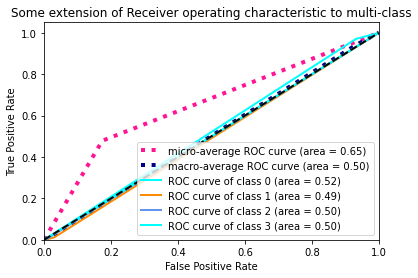

Average precision score, macro-averaged over all classes: 0.25


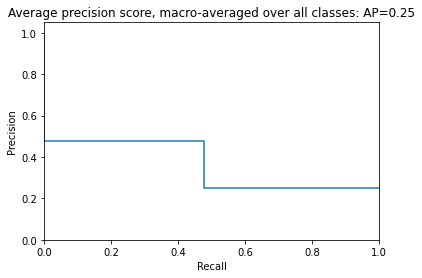

In [0]:
clf, df, report = ET_Classifier(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

training score:  1.0
score:  0.40809599835195964
Macro ROC AUC score per class : 0.5264822060664474
Weighted ROC AUC score : 0.5275382965965308
Macro Precision value per class : 0.26340754625281243
Weighted precision value : 0.3255911433228947
classification report: 
               precision    recall  f1-score   support

         0.0       0.48      0.71      0.57      8903
         1.0       0.37      0.13      0.20      4168
         2.0       0.14      0.09      0.11      2594
         3.0       0.28      0.22      0.25      3752
         4.0       0.00      0.00      0.00         0

    accuracy                           0.41     19417
   macro avg       0.25      0.23      0.22     19417
weighted avg       0.37      0.41      0.37     19417



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


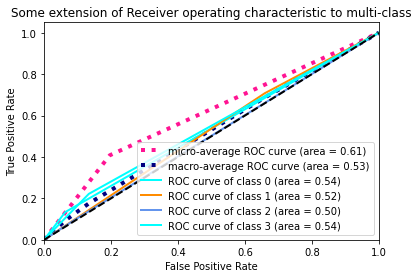

Average precision score, macro-averaged over all classes: 0.26


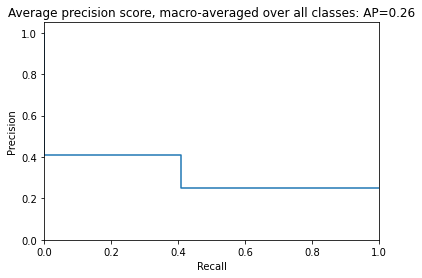

In [0]:
X_train_res, y_train_res = smotetomek(X_train, y_train)
y_train_res = pd.DataFrame(y_train_res)
clf, df, report = ET_Classifier(X_train_res, X_test, y_train_res, y_test)